# Lab 17 - K-Nearest Neighbors for Classification

Note:  This lab is partially based on the notebook [DAY 3: Classification - decision trees, random forests and k-NN classifiers](https://deepnote.com/project/3-more-classification-qkzrkkMjSYW8BqqN9u5Fyg/%2F05_classification_trees_and_forests.ipynb) from the IACS Data Science Winter Pedagogy Workshop by Weiwei Pan and David Sondak.

The k-nearest neighbors algorithm predicts based on the values of the k closest training data. For example, a 3-nearest neighbor algorithm will find the 3 closest data points (using the Euclidean distance) in the training data and use them to make a prediction.

If we are performing regression (trying to predict a quantitative value), the prediction is the mean of the y values of the k neighbors.  K-nearest neighbors regression was covered in Lab 13.

If we are classifying (trying to predict qualitative value), the prediction is the class that appears the most in the k neighbors.

We will start by looking at the vegetation data similar to Lab 16, and compare the decision boundaries made by decision trees, random forests, and k-nearest neighbors.

### Section 1:  Loading and cleaning the data

First, import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Next, load the data.  As in Lab 16, the first two columns are the latitude and longitude normalization (centered at 0 and with variance 1) and the third column contains a 1 if that coordinate had vegetation and a 0 if not.

The data is actually a different data set, and at the URL:  [https://raw.githubusercontent.com/cs109Alabs/lab_files/master/Lab_8/datasets/dataset_4.txt](https://raw.githubusercontent.com/cs109Alabs/lab_files/master/Lab_8/datasets/dataset_4.txt)

Open the data in Jupyter notebook.  What do we have to do to read in this data with column names `x_coord`, `y_coord`, and `veg`?

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/cs109Alabs/lab_files/master/Lab_8/datasets/dataset_4.txt", header = None, names = ["x_coord", "y_coord", "veg"])

As in Lab 16, plot the data as a scatterplot (with `x_coord` on the x axis and `y_coord` on the y axis) colored by the `veg` column.  If you are using Seaborn `relplot()`, you can color the vegetation green and the lack of vegetation brown with the parameter `palette = ["brown","green"]`.

/Users/simon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x_coord', ylabel='y_coord'>

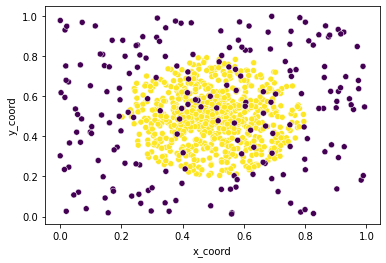

In [5]:
sns.scatterplot(data['x_coord'], data['y_coord'], c=data['veg'])

What do you notice about the location and shape of the vegetation?

We will also use the scikit learn package for decision tree classifiers, so we need to prepare the data in the same way as previous labs (including Lab 16):
* create a variable `x` containing the first two columns, which will be used to train the model and make the predictions.  The type of `x` should be a DataFrame.
* create a variable `y` containing the third column, which is the variable we are trying to predict.  The type of `y` should be a Series.

Finally, split the data into training (80%) and testing (20%) data.

### Section 2:  K-Nearest Neighbors Classifiers

We will fit a k-nearest neighbors classifier with k = 5 to the training data with the following code:

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(x_train, y_train)

Can you figure out how to use this model to predict whether there is a vegetation at each coordinate in the test data?  

Hint:  All scikit-learn machine learning models use the same code functions.

<details><summary>Answer:</summary>
y_test_preds = knn5.predict(x_test)
</details>

We can also generate a confusion matrix to evaluate the classification with scikit-learn:

In [ ]:
confusion_matrix(y_test,y_test_preds)

Remember for the `confusion_matrix()` function in scikit-learn the first parameter for is the rows and the second parameter is the columns.  Thus `confusion_matrix(y_test,y_predictions)` gives the confusion matrix:


<code>   
                        predicted
             |    0           |      1      |
             --------------------------------
observed | 0 | true negative  | false positive
         | 1 | false negative | true positive
</code>

If the categories are something other than 0 and 1, they will be ordered in alphabetically order (ie. the first row is the category closest to a in the alphabet).

What is the accuracy of the classifier?

What is the sensitivity of the classifier?

What is the specificity of the classifier?

Which does our 5-nearest neighbors classifier predict the location of better:  vegetation or no vegetation?

Let's visualize the decision boundary of the classifier.  Recall the decision boundary splits all possible coordinates into those predicted as 1 (vegetation) and those predicted as 0 (non-vegetation).

Run the following code to load the visualization functions in your Jupyter notebook so you can use them.

In [ ]:
def scatter_plot_data(x_df, y_series, ax):
    '''
    scatter_plot_data scatter plots the satellite data. A point in the plot is colored 'green' if 
    vegetation is present and 'gray' otherwise.
    
    input:
       x_df - a DataFrame of size N x 2, each row is a location, each column is a coordinate
       y_series - a Series of length N, each entry is either 0 (no vegetation) or 1 (vegetation)
       ax - axis to plot on
    returns: 
       ax - the axis with the scatter plot
    '''
    
    # convert x_df and y_series into numpy arrays
    x = x_df.values
    y = y_series.values
    
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='green', label='vegetation')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='gray', label='nonvegetation')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.legend(loc='best')
    return ax

def plot_decision_boundary(x_df, y_series, model, ax, plot_boundary_only=False):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x_df - a DataFrame of size N x 2, each row is a location, each column is a coordinate
       y_series - a Series of length N, each entry is either 0 (non-vegetation) or 1 (vegetation)
       model - the 'sklearn' classification model
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
    returns: 
       ax - the axis with the scatter plot
    
    '''
    
    # convert x_df and y_series into numpy arrays
    x = x_df.values
    y = y_series.values
    
    # Plot data
    if not plot_boundary_only:
        ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='green', label='vegetation')
        ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='gray', label='non-vegetation')
    
    # Create mesh
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)
    
    # Predict on mesh points
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if not plot_boundary_only:
        ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    ax.contour(x1, x2, yy, colors='black', linewidths=0.1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.legend(loc='best')
    return ax

Now, let's use this code to plot the decision boundary of the 5-nearest neighbor model we just fitted.

In [ ]:
# set up to create two plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and KNN decision boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, knn5, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')

#  plot the test data and KNN decision boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, knn5, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

What do you notice about the decision boundary?

### Section 3: Changing the number of neighbors

Let's see how changing the number of neighbors changes the decision boundary. 

Fill in the code below to create a new k-nearest neighbors classifier with k = 3 called `knn3`, and fit it to the training data.

In [ ]:
### FILL IN CODE
# Create a 3-nearest neighbor classifier fit to the training data.


# set up to create three plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and KNN decision boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, knn3, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')

#  plot the test data and KNN decision boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, knn3, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

How did the decision boundary change from the 5-nearest neighbor classifier?

Now fill in the code below to create a k-nearest neighbor classifier with k = 10, called `knn10`.

In [ ]:
### FILL IN CODE
# Create a 3-nearest neighbor classifier fit to the training data.

# set up to create two plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and KNN decision boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, knn10, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')

#  plot the test data and KNN decision boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, knn10, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

How does this decision boundary compare to the one with k = 3 and the one with k = 5?  Which classifier do you think is best? 

Let's also compare the confusion matrices.  Using the k = 3 classifier, predict the y values for the test data and compute the confuction matrix.

How does this confusion matrix compare to the one for k = 5?  

Now use your k = 10 classifier to predict the y values for the test data and compute that confuction matrix.

How does this confusion matrix compare to the one for k = 3 and the one for k = 5?  


### Section 4: Comparison with decision tree classifier

Fill in the code below to fit a decision tree classifier of max depth 8 to the training data.  Call your classifier variable `tree`.

In [ ]:
### FILL IN CODE
# Create a decision tree of max depth 8 fit to the training data.


# set up to create two plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and KNN decision boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, tree, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')

#  plot the test data and KNN decision boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, tree, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

What do you notice about the decision boundary?  How does it compare to the k-nearest neighbor one?

Use the decision tree classifier to make predictions using the test data and compute their confusion matrix.

How does the confusion matrix compare to the best k-nearest neighbors one?

Try some different max depths.  Is the best decision tree better or worse than the k-nearest neighbors model with the best k?

### Section 5: Comparison with random forest classifier

Next try a random forest classifier, by creating one in the code below.

In [ ]:
### FILL IN CODE
# Create a random forest classifier of max depth 10 with 500 decision trees,
# fit to the training data.



# set up to create two plots in the same image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# visualize the data on the first plot (ax[0])
scatter_plot_data(x_train, y_train, ax[0])
ax[0].set_title('Training Data')

#  plot the training data and KNN decision boundary on the second plot (ax[1])
plot_decision_boundary(x_train, y_train, rf, ax[1])
ax[1].set_title('Decision Boundary on the Training Data')

#  plot the test data and KNN decision boundary on the third plot (ax[2])
plot_decision_boundary(x_test, y_test, rf, ax[2])
ax[2].set_title('Decision Boundary on the Test Data')

How does the random forest decision boundary compare to the decision tree and k-nearest neighbors' decision boundaries?

Try some different max depths and number of estimators (decision trees) to find the best combination.

Using this combination, make a prediction for the test data and compute the confusion matrix for it.

What is the accuracy?

What is the sensitivity?

What is the specificity?

How do these compare to the values for k-nearest neighbors?  Which model is best for predicting vegetation?